<a href="https://colab.research.google.com/github/Artful-Donut/MachineLearning-Practice/blob/main/CAP4611%20-%20HW4%20-%20K-nearest%20neighbors%20and%20multiple%20linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4

This homework asks you to perform various experiments with k-nearest neighbors and related algorithms.

The dataset is the same real estate dataset we previously used from:

https://www.kaggle.com/datasets/mirbektoktogaraev/madrid-real-estate-market

You will write code and discussion into code and text cells in this notebook.

If a code block starts with TODO:, this means that you need to write something there.

There are also markdown blocks with questions. Write the answers to these questions in the specified locations.

Some code had been written for you to guide the project. Don't change the already written code.

## Grading
The points add up to 100. Extensive partial credit will be offered. Thus, make sure that you are at least attempting all problems.

Make sure to comment your code, such that the grader can understand what different components are doing or attempting to do.

Important Instruction: Please submit the code following this style of file: "lastname_firstname_UCFID.ipynb "

In [ ]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors


In [ ]:
import time

## A. Setup for the single variable part

In this part we are creating training data and test data in a single variable setting. The explanatory variable ``sq_mt_built`` is used to predict the price of the house ``buy_price``.

This part is had been done for you, such that the work does not depend on you importing parts from the previous projects.

Training data is composed of 16000 samples.
Test data is composed of 5616 samples.
Number of NaN-s in training data x: 0
Number of NaN-s in training data y: 0
Number of NaN-s in test data x: 0
Number of NaN-s in test data y: 0


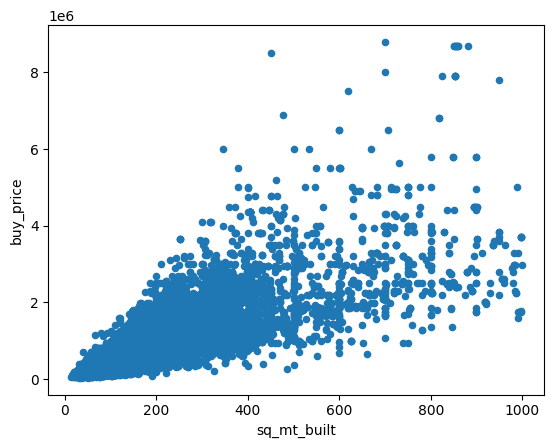

In [ ]:
df = pd.read_csv("houses_Madrid.csv")
#print(f"The lenght {len(df.index)}")
#print(f"The columns of the database {df.columns}")
dfsel = df[["sq_mt_built", "buy_price"]]
dfselnona = dfsel.dropna()
dfselnona.plot.scatter(x="sq_mt_built", y="buy_price")
df_shuffled = dfselnona.sample(frac=1) # shuffle the rows
x = df_shuffled[["sq_mt_built"]].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)
training_data_x = x[:16000]
training_data_y = y[:16000]
test_data_x = x[16000:]
test_data_y = y[16000:]
print(f"Training data is composed of {len(training_data_x)} samples.")
print(f"Test data is composed of {len(test_data_x)} samples.")

print(f"Number of NaN-s in training data x: {np.count_nonzero(np.isnan(training_data_x))}")
print(f"Number of NaN-s in training data y: {np.count_nonzero(np.isnan(training_data_y))}")
print(f"Number of NaN-s in test data x: {np.count_nonzero(np.isnan(test_data_x))}")
print(f"Number of NaN-s in test data y: {np.count_nonzero(np.isnan(test_data_y))}")

# B. Establishing an error baseline for linear regression

Here we are going to implement the regresssion using linear regression. We also check the performance of the resulting regressor, and print the error.

This part is had been done for you, such that the work does not depend on you importing parts from the previous projects.

You will need to adapt this for the other models.

In [ ]:
# training the linear regressor
regressor = sklearn.linear_model.LinearRegression().fit(training_data_x, training_data_y)
# We will create the predictions yhat for every x from the training data. We will do this one at a time. This is not an efficient way to do it, but it allows you to write and debug functions that return a scalar number
yhats = []
for x in test_data_x:
    yhat = regressor.predict([x])
    yhats.append(yhat[0])

# Now, print some examples of the quality of the classifier
examples = [45, 67, 170, 189, 207]
for i in examples:
    x = test_data_x[i]
    y = test_data_y[i]
    yhat = regressor.predict([x])[0]
    print(f"House {i} with {x} sqmt was sold for {y} euros, but our system predicted {yhat:.2f}")

# Now calculate the root mean square error on the resulting arrays
error = sklearn.metrics.mean_squared_error(yhats, test_data_y)
print(f"The mean square error of the linear regression is {error:.2f} euro")


House 45 with [110.] sqmt was sold for 360000.0 euros, but our system predicted 465549.70
House 67 with [205.] sqmt was sold for 895000.0 euros, but our system predicted 906509.15
House 170 with [75.] sqmt was sold for 189900.0 euros, but our system predicted 303090.95
House 189 with [63.] sqmt was sold for 113000.0 euros, but our system predicted 247390.81
House 207 with [138.] sqmt was sold for 945000.0 euros, but our system predicted 595516.69
The mean square error of the linear regression is 157648527914.93 euro


# P1: K-nearest neighbors (50 points)

Implement the k-nearest neighbors algorithm in a function called k_nearest_neighbor_predict.

You do not necessarily need to do anything for training, but if you choose to do something, then return the created data structures from the training function, and pass it to the prediction function.

Experiment with the function you have implemented for at least the k values 1, 3 and 15.

In [ ]:
# TODO implement the nearest neighbor algorithm here

def k_nearest_neighbor_training(k, training_data_x, training_data_y):
    # you don't necessarily need to implement anything here.
    pass

def k_nearest_neighbor_predict(x, k, training_data_x, training_data_y):
    distances = []

    # iterate through training data x and calculate all the distances
    # save this as a tuple
    for i in range(len(training_data_x)):
        distances.append((abs(x - training_data_x[i]), i))

    # sort the distances (by distance)
    distances.sort(key=lambda tup: tup[0])

    # convert the indexes into the y_values
    neighbour_ys = []
    for i in range(k):
        neighbour_ys.append(training_data_y[distances[i][1]])

    # return avg of the ys
    return sum(neighbour_ys) / k

In [ ]:
# TODO experiment with the function you implemented similar to the way we did in section B.

# Initialize array with different number of neighbors so we can test everything out in a for-loop
num_neighbours = [1,3,15]
houses = [45, 67, 170, 189, 207]

for k in num_neighbours:
    print(f"Number of neighbours: {k}")

    # Test out on some examples
    for i in houses:
      # Get the x value and the expected value
      x = test_data_x[i]
      y = test_data_y[i]

      # Use x to predict y value
      yhat = k_nearest_neighbor_predict(i, k, training_data_x, training_data_y)


      # print results
      print(f"House {i} with {x[0]} sqmt was sold for {y} euros, but our system predicted {yhat:.2f}")



    # calculate predictions for all of the test_data_x, also marking the time
    begin = time.time() # start time
    expectedy = []
    for value in test_data_x:
        prediction = k_nearest_neighbor_predict(value, k, test_data_x, test_data_y)
        expectedy.append(prediction)
    end = time.time() # end time
    print(f"Time: {end - begin}")
    # calculating the error with sklearn mse
    error = sklearn.metrics.mean_squared_error(expectedy, test_data_y)
    print(f"The mean square error of the linear regression is {error:.2f} euro")
    print("\n")

Number of neighbours: 1
House 45 with 110.0 sqmt was sold for 360000.0 euros, but our system predicted 135000.00
House 67 with 205.0 sqmt was sold for 895000.0 euros, but our system predicted 230000.00
House 170 with 75.0 sqmt was sold for 189900.0 euros, but our system predicted 950000.00
House 189 with 63.0 sqmt was sold for 113000.0 euros, but our system predicted 2250000.00
House 207 with 138.0 sqmt was sold for 945000.0 euros, but our system predicted 1050000.00
Time: 296.90120339393616
The mean square error of the linear regression is 185856493260.42 euro


Number of neighbours: 3
House 45 with 110.0 sqmt was sold for 360000.0 euros, but our system predicted 138000.00
House 67 with 205.0 sqmt was sold for 895000.0 euros, but our system predicted 177633.33
House 170 with 75.0 sqmt was sold for 189900.0 euros, but our system predicted 765000.00
House 189 with 63.0 sqmt was sold for 113000.0 euros, but our system predicted 1278333.33
House 207 with 138.0 sqmt was sold for 945000.0 e

# Questions:
* Q: Do you find that kNN has a higher accuracy than linear regression?
* A: The accuracy improves with kNN, especially when there are more k values (though to diminishing returns as the k value gets higher and higher)
* Q: How do you find the performance of the implementation? Is it faster or slower than linear regression?
* A: The performance far exceeds linear regression, taking more than 2 minutes per testing (and even longer for a higher k value). In total, this entire cell took about 15 minutes to execute. I believe this is largely because of the sorting algorithm, which gets called for every data point.

# P2: K nearest neighbors using sklearn (20 points)
Use the KNeighborsRegressor function from sklearn to solve the problem. Print the resulting error and samples, similar to the way in Section B.

Experiment with at least with the k (number of neighbors) values 1, 3 and 15.

Answer the questions in the markdown section.

In [ ]:
# TODO implement here

# import the module
from sklearn.neighbors import KNeighborsRegressor

# Initialize array with different number of neighbors so we can test everything out in a for-loop
num_neighbours = [1,3,15]
houses = [45, 67, 170, 189, 207]
for k in num_neighbours:
    print(f"Number of neighbours: {k}")

    begin = time.time() # start time

    # create regressor object
    neighbours = KNeighborsRegressor(n_neighbors=k)

    # fit the training data
    neighbours.fit(training_data_x, training_data_y)

    end = time.time() # end time

    print(f"Training time: {end - begin}")
    # print results
    for i in houses:
      # Get the x value and the expected value
      x = test_data_x[i]
      y = test_data_y[i]

      # Use x to predict y value
      yhat = neighbours.predict([x])

      # print results
      print(f"House {i} with {x} sqmt was sold for {y} euros, but our system predicted {yhat[0]:.2f}")


    # calculate predictions for all of the test_data_x (as well as the testing time)
    begin = time.time()
    expectedy = []
    for x in test_data_x:
        prediction = neighbours.predict([x])
        expectedy.append(prediction[0])
    end = time.time()
    # calculating the error with sklearn mse
    error = sklearn.metrics.mean_squared_error(expectedy, test_data_y)
    print(f"Testing time: {end - begin}")
    print(f"The mean square error of the linear regression is {error:.2f} euro")

    print("\n")


Number of neighbours: 1
Training time: 0.0091094970703125
House 45 with [110.] sqmt was sold for 360000.0 euros, but our system predicted 395000.00
House 67 with [205.] sqmt was sold for 895000.0 euros, but our system predicted 899999.00
House 170 with [75.] sqmt was sold for 189900.0 euros, but our system predicted 260000.00
House 189 with [63.] sqmt was sold for 113000.0 euros, but our system predicted 82000.00
House 207 with [138.] sqmt was sold for 945000.0 euros, but our system predicted 668000.00
Testing time: 3.3509676456451416
The mean square error of the linear regression is 231432744427.08 euro


Number of neighbours: 3
Training time: 0.005452871322631836
House 45 with [110.] sqmt was sold for 360000.0 euros, but our system predicted 421666.67
House 67 with [205.] sqmt was sold for 895000.0 euros, but our system predicted 1623333.00
House 170 with [75.] sqmt was sold for 189900.0 euros, but our system predicted 213000.00
House 189 with [63.] sqmt was sold for 113000.0 euros, 

# Questions:
* Q: Do you find that the sklearn version has a higher accuracy than your implementation?
* A: It was somewhat comparable, but my implementation consistently performed slightly better than sklearn's implementation
* Q: How do you find the performance of the sklearn implementation? Is it faster or slower than your implementation?
* A: sklearn's implementations ran circles around mine at around 3 seconds, while mine averaged around 3-4 minutes. For an improvement in error of a few tens of billions, sklearn definitely has the superior method.

# C. Setup for the multi-variable part.

For the next part of the project, we are going to work in a multi-variable setting.

This time, there are 7 explanatory variables: ``sq_mt_built``, ``n_rooms``, ``n_bathrooms``, ``is_renewal_needed``, ``is_new_development`` and ``has_fitted_wardrobes``.

We will first create the training and test data while doing some minimal data cleaning.

In [ ]:
df = pd.read_csv("houses_Madrid.csv")
#print(f"The columns of the database {df.columns}")

xfields = ["sq_mt_built", "n_rooms", "n_bathrooms", "has_individual_heating", \
           "is_renewal_needed", "is_new_development", "has_fitted_wardrobes"]
yfield = ["buy_price"]
# print (xfields + yfield)
dfsel = df[xfields + yfield]
dfselnona = dfsel.dropna()
df_shuffled = dfselnona.sample(frac=1) # shuffle the rows
x = df_shuffled[xfields].to_numpy(dtype=np.float64)
y = df_shuffled[yfield].to_numpy(dtype=np.float64)
print(x.shape)
training_data_x = x[:8000]
training_data_y = y[:8000]
test_data_x = x[8000:]
test_data_y = y[8000:]
print(f"Training data is composed of {len(training_data_x)} samples.")
print(f"Test data is composed of {len(test_data_x)} samples.")
# print(test_data_x[45])

(9764, 7)
Training data is composed of 8000 samples.
Test data is composed of 1764 samples.


# D. Creating a linear regression multi-variable baseline.

In this section we make a linear regression predictor for the multi-variable case. We also check the performance of the resulting regressor, and print the error.

This part is had been done for you, such that the work does not depend on you importing parts from the previous projects.

You will need to adapt this for the other models.

In [ ]:
# training the linear regressor
regressor = sklearn.linear_model.LinearRegression()
regressor.fit(training_data_x, training_data_y)
# We will create the predictions yhat for every x from the training data. We will do this one at a time. This is not an efficient way to do it, but it allows you to write and debug functions that return a scalar number
yhats = []
for x in test_data_x:
    yhat = regressor.predict([x])
    yhats.append(yhat[0])

# Now, print some examples of the quality of the classifier
examples = [45, 67, 170, 189, 207]
for i in examples:
    x = test_data_x[i]
    y = test_data_y[i]
    yhat = regressor.predict([x])[0][0]
    print(f"House {i} with {x[0]} sqmt was sold for {y} euros, but our system predicted {yhat:.2f}")

# Now calculate the root mean square error on the resulting arrays
error = sklearn.metrics.mean_squared_error(yhats, test_data_y)
print(f"The mean square error of the linear regression is {error:.2f} euro")

House 45 with 52.0 sqmt was sold for [121000.] euros, but our system predicted 187685.18
House 67 with 138.0 sqmt was sold for [570000.] euros, but our system predicted 545744.11
House 170 with 234.0 sqmt was sold for [2490000.] euros, but our system predicted 1053941.35
House 189 with 148.0 sqmt was sold for [565000.] euros, but our system predicted 586283.91
House 207 with 155.0 sqmt was sold for [740000.] euros, but our system predicted 707984.19
The mean square error of the linear regression is 165378591179.43 euro


# P3: K nearest neighbors using sklearn (30 points)

Use the KNeighborsRegressor function from sklearn to predict the prices of the house. Print the resulting error and samples, similar to the way in Section D.

* Experiment with at least with the k (number of neighbors) values 1, 3 and 15.
* Experiment with different values for the weights parameter (uniform vs distance)
* Experiment with different values for the metric
    * Euclidean
    * Manhattan
    * Some other Minkowski metric parameter (explain which)
* Answer the questions in the markdown section.

In [ ]:
# TODO implement here
# import the module (again, just in case)
from sklearn.neighbors import KNeighborsRegressor
from scipy.spatial.distance import minkowski

# Initialize array with different number of neighbors so we can test everything out in a for-loop
num_neighbours = [1,3,15]

# save best error and metrics (before that)
best_error = float('inf')
best_metrics = ('neighbours', 'weight', 'metric')
errors = []
for k in num_neighbours:
    # Testing with all of the required values and adding to an array for analysis
    error_values = []
    for weight in ['uniform', 'distance']:
        for dist in ['euclidean', 'manhattan', 'minkowski']:
            print(f"Number of neighbours: {k}")
            print(f"Weight: {weight}")
            print(f"Metric: {dist}")

            # start timing :eyes:
            begin = time.time() # start time

            # create regressor object with desired values
            neighbours = KNeighborsRegressor(n_neighbors=k, weights=weight, metric=dist)
            if(dist == 'minkowski'):
                # If we're using minkowski distance, let's try out p=7 (for fun)
                # One for each feature.
                neighbours = KNeighborsRegressor(n_neighbors=k, weights=weight, metric=dist, p=7)

            # fit the training data
            neighbours.fit(training_data_x, training_data_y)

            end = time.time() # end time

            print(f"Fitting time: {end - begin}")


            # calculate predictions for all of the test_data_x (as well as the testing time)
            expectedy = []
            for x in test_data_x:
                prediction = neighbours.predict([x])
                expectedy.append(prediction[0])
            # calculating the error with sklearn mse
            error = sklearn.metrics.mean_squared_error(expectedy, test_data_y)
            print(f"The mean square error of the linear regression is {error:.2f} euro")
            error_values.append(error)

            if(error < best_error):
                best_error = error
                best_metrics = (k, weight, dist)

            print("\n")
    errors.append(error_values)

# Print the best specs
print(f"Best error: {best_error}")
print(f"Best metrics: {best_metrics}")

print(errors)

Number of neighbours: 1
Weight: uniform
Metric: euclidean


NameError: name 'time' is not defined

# Questions:
* Q: Do you find that the kNN implementation for multiple input variables performs better that linear regression? Discuss.
* A: *With a sufficently high enough number of neighbours, kNN implementation performs better than linear regression by a few tens of billions of values.*
* Q: Do you find that the kNN implementation for multiple input variables performs better than the version for a single variable? Discuss.
* A: *In my opinion, the kNN implementation works about the same for multiple input and single input variables. Throughout the trials, the range of error for multiple input variables is about the same as the range of error for a comparable k value a single variable, not including the ways finetuning hyperparemeters have affected the results. When the multiiple input model is optimized for the data, it performs better, but when it isn't, it preforms worse.*
* Q: Discuss how sensitive the kNN implementation is to the setting of the hyperparameters.
* A: *kNN implementation is fairly sensitive to the setting of the hyperparameters. A higher k value naturally decreases error, though with diminishing returns (1 --> 3 neighbours yields around a 60 billion improvement in error, while 3 --> 15 neighbours yields around a 20 billion improvement in error). Distance weights show the most decrease when accounting for the same k value, and manhattan distance will have the best performance even when accounting for both the same k and the same weight. (Minkowski distance when p=7 performs better than average, but manhattan distance still returns a smaller error.)*
